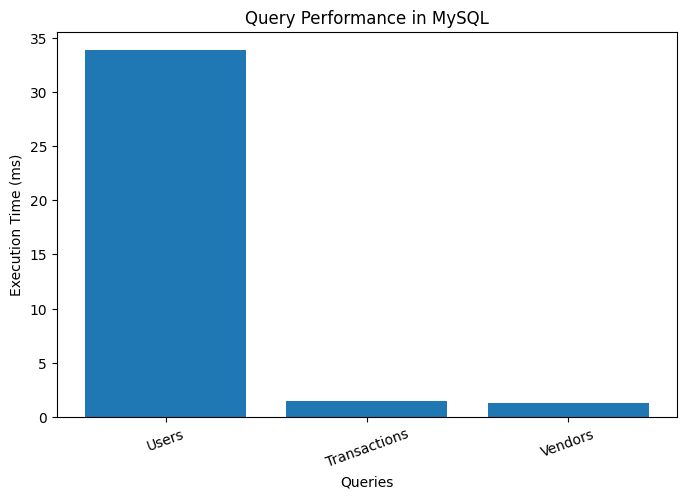

In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import time

# Database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0101",
    database="fintech_platform"
)
cursor = conn.cursor()

# Query execution times
query_times = []
queries = [
    "SELECT * FROM Users LIMIT 1000",
    "SELECT * FROM Financial_Transactions LIMIT 1000",
    "SELECT * FROM Vendors LIMIT 1000"
]

for query in queries:
    start_time = time.time()  # Start timer
    cursor.execute(query)
    cursor.fetchall()  # Fetch all results to ensure execution completes
    execution_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    query_times.append(execution_time)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(queries)), query_times, tick_label=["Users", "Transactions", "Vendors"])
plt.xlabel("Queries")
plt.ylabel("Execution Time (ms)")
plt.title("Query Performance in MySQL")
plt.xticks(rotation=20)
plt.show()

# Close connection
cursor.close()
conn.close()
